In [1]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def nu_mu_atm(x):
    factor = 1.e-4/(4*np.pi)
    gamma=3.90475384e+00
    phi=1.28843143e+07 
    return factor * phi * np.power((x), -gamma)

In [18]:
def nu_e_atm(x):
    factor = 1.e-4/(4*np.pi)
    gamma=3.59217183e+00
    phi=7.45648604e+04 
    return factor * phi * np.power((x), -gamma)

In [19]:
def sigma_nu_cc(x):
    return np.piecewise(x, [x < 8, x >= 8], [lambda x : np.exp(-8.26068*10 + x*1.03968), lambda x : np.exp(-8.08147*10 + x*0.812867)])

In [20]:
def sigma_nu_nc(x):
    return np.piecewise(x, [x < 8, x >= 8], [lambda x : np.exp(-8.38165*10 + x*1.07417), lambda x : np.exp(-8.18376*10 + x*0.822837)])

In [21]:
def p_100TeV(x):
    phi = 5.46454189
    gamma = 0.35567507
    return phi * np.power((x), -gamma) 

In [60]:
def astro_flux(x):
    C0 = 3e-18
    E0 = 100e3
    gamma = 2.53
    phi = 1.66/6.0
    return C0 * phi * np.power((x/E0), -gamma)

In [61]:
def integrand_1_bg(x):
    return nu_mu_atm(x)*sigma_nu_nc(np.log10(x))*p_100TeV(x)

In [62]:
def integrand_2_bg(x):
    return nu_e_atm(x)*sigma_nu_cc(np.log10(x))

In [63]:
def integrand_1_sg(x):
    return astro_flux(x)*sigma_nu_nc(np.log10(x))*p_100TeV(x)

In [64]:
def integrand_2_sg(x):
    return astro_flux(x)*sigma_nu_cc(np.log10(x))

In [65]:
log_Emin = 5.0
log_Emax = 12.0
nPoints = 2000
step=(log_Emax-log_Emin)/nPoints
logE=np.arange(log_Emin, log_Emax, step)
E = np.power(10,logE)

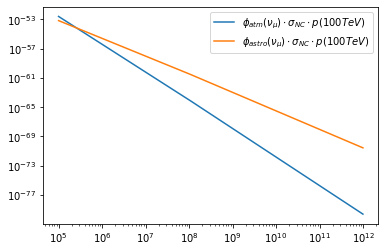

In [66]:
plt.yscale("log")
plt.xscale("log")
plt.plot(E,integrand_1_bg(E),label=(r"$\phi _{atm}(\nu _{\mu})\cdot \sigma _{NC}\cdot p(100 TeV)$"))
plt.plot(E,integrand_1_sg(E),label=(r"$\phi _{astro}(\nu _{\mu})\cdot \sigma _{NC}\cdot p(100 TeV)$"))
plt.legend()

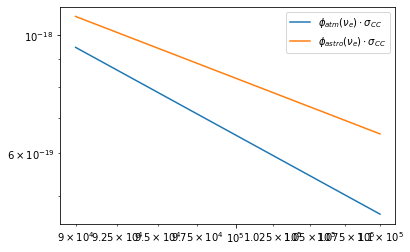

In [67]:
plt.yscale("log")
plt.xscale("log")
emin = 9e4
emax = 1.1e5
n = 1000
step = (emax-emin)/n
en = np.arange(emin,emax,step)
plt.plot(en,nu_e_atm(en),label=(r"$\phi _{atm}(\nu _{e})\cdot \sigma _{CC}$"))
plt.plot(en,astro_flux(en),label=(r"$\phi _{astro}(\nu _{e})\cdot \sigma _{CC}$"))
plt.legend()

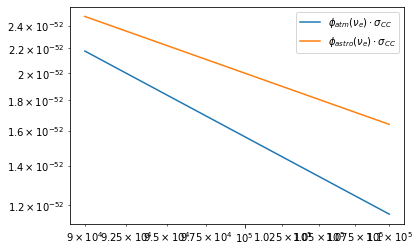

In [68]:
plt.yscale("log")
plt.xscale("log")
emin = 9e4
emax = 1.1e5
n = 1000
step = (emax-emin)/n
en = np.arange(emin,emax,step)
plt.plot(en,integrand_2_bg(en),label=(r"$\phi _{atm}(\nu _{e})\cdot \sigma _{CC}$"))
plt.plot(en,integrand_2_sg(en),label=(r"$\phi _{astro}(\nu _{e})\cdot \sigma _{CC}$"))
plt.legend()

In [69]:
# plt.yscale("log")
# plt.xscale("log")
# plt.plot(E,nu_mu_atm(E),label=(r"$\phi _{atm}(\nu _{e})\cdot \sigma _{CC}$"))
# plt.plot(E,astro_flux(E),label=(r"$\phi _{astro}(\nu _{e})\cdot \sigma _{CC}$"))
# plt.legend()

In [70]:
A = quad(integrand_1_bg, 1e5, np.inf)

In [71]:
A

(3.2786459298346506e-50, 6.07404563902411e-50)

In [72]:
B = quad(integrand_2_bg, 9e4, 1.1e5)

In [73]:
B

(3.198261071196281e-48, 3.5507830800044286e-62)

In [74]:
C = quad(integrand_1_sg, 1e5, np.inf)

In [75]:
C

(8.917182110687327e-51, 1.6523082180610952e-50)

In [76]:
D = quad(integrand_2_sg, 9e4, 1.1e5)

In [77]:
D

(4.043169464832698e-48, 4.488819832318633e-62)

In [78]:
(C[0]+D[0])/(A[0]+B[0]+C[0]+D[0])

0.5563657826730836